# Diffusion: First-order Kinetics, Multi-Component, Unsteady

In this tutorial we will consider the 1D diffusion equation:

$$\frac{\partial c}{\partial t} + \mathrm{div}(- D \, \mathrm{grad}(c)) = r(c)$$

Here the terms are, first, an accumulation term, second a diffusion term, and last on the right-hand-side a reaction term. In this tutorial we will consider first order kinetics, $r(c)=-k \, c$.

When we apply Euler-backward time discretization, with all terms evaluated implicitly the `PyMRM`, the discretized form can be expressed as:
```python
(c - c_old) / dt - div_mat @ (D * grad_mat @ c) = r(c)
```

## Stationary Diffusion with First-order kinetics

One-component stationary diffusion with first order kinetics is described by

$$k\, c - D \, \mathrm{div} (\mathrm{grad}(c)) = 0$$

We discretize this as:
```python
k * c - div_mat @ ( D* (grad_mat @ c + grad_bc)) = 0
(k * identity_matrix - div_mat @ (D * grad_mat)) @ c = div_mat @ (D* grad_bc)
```

The identity matrix appears becasue of the `c` that is taken out of the bracket. A identity matrix can be created, e.g., by the `eye_array` function of `scipy.sparse`. Here we however choose to use the `PyMRM` `construct_coefficient_matrix` function. It can be used to put 'field values' on the diagonal of a matrix. If the values are the same for all components of `c` one can also provide the single value and the shape of the field. The value will be 'broadcast' such that the same value is used for each diagonal element.
When the matrix on the rhs is constructed, the matrix-vector equation can be solved by using `spsolve`.


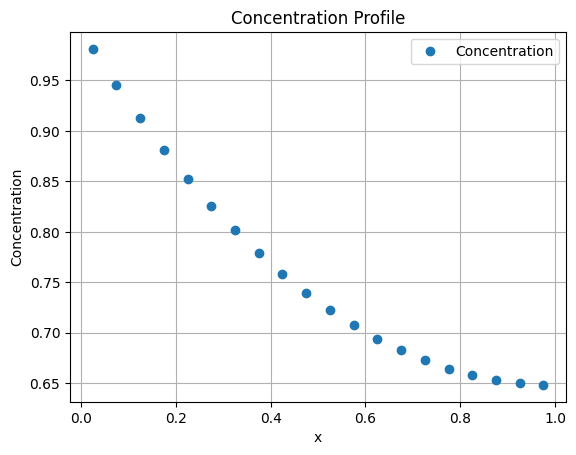

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pymrm import construct_grad, construct_div, construct_coefficient_matrix
import scipy.sparse.linalg as spla

num_x = 20 # Number of grid points in x direction	
L = 1.0 # Length of the domain in x direction
D = 1.0 # Diffusion coefficient
k = 1.0 # Reaction coefficient
c_b = 1.0 # Boundary condition at x=0
x_f = np.linspace(0, 1, num_x + 1) # x grid points
x_c = 0.5*(x_f[1:] + x_f[:-1]) # x cell centers

bc = ({'a':0, 'b':1,'d':c_b}, # Dirichlet boundary condition
      {'a':1, 'b':0,'d':0}) # Neumann boundary condition

# Construct the coefficient matrix
k_mat = construct_coefficient_matrix(k, shape=(num_x,))

# Construct the gradient and divergence matrices
grad_mat, grad_bc = construct_grad((num_x,), x_f, x_c, bc)
div_mat = construct_div((num_x,), x_f)

A_mat = k_mat - div_mat @ (D*grad_mat)
rhs_vec = div_mat @ (D*grad_bc)

# Solve the system of equations
c = spla.spsolve(A_mat, rhs_vec)

# Plot the results
plt.plot(x_c, c, 'o', label='Concentration')
plt.xlabel('x')
plt.ylabel('Concentration')
plt.title('Concentration Profile')
plt.legend()
plt.grid()
plt.show()


### Exercises

- Play around with the number of grid points, and physical variables. Hint: The dimensional group $\phi = L \sqrt{k/D}$, called the Thiele modulus, determines the shape of the curve.
- Derive a analytical expression for the concentration profile. Hint: Taken into account the Neumann boundary condition on the rhs gives a function of the form $\cosh(\alpha (L-x))$. To quickly arrive at an analytial solution, substitute this form in the equation to find $\alpha$. The missing multiplication factor can be obtained from the Dirichlet boundary condition.
- Compare the analytical solution with the numerical one. Especially for the case of a relatively small number of grid cells and large $\phi$.